# 기본세팅

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

## 환자 돌봄 장소

In [4]:
place = {
    '장소': ['병원', '자택'],
    '당월(2024년 3월)(%)': [93.6, 6.5],
    '전체(2020년 9월 ~ 2024년 3월)(%)': [89.2, 10.8]
}

df_care_place = pd.DataFrame(place)
df_care_place

,장소,당월(2024년 3월)(%),전체(2020년 9월 ~ 2024년 3월)(%)
0,병원,93.6,89.2
1,자택,6.5,10.8


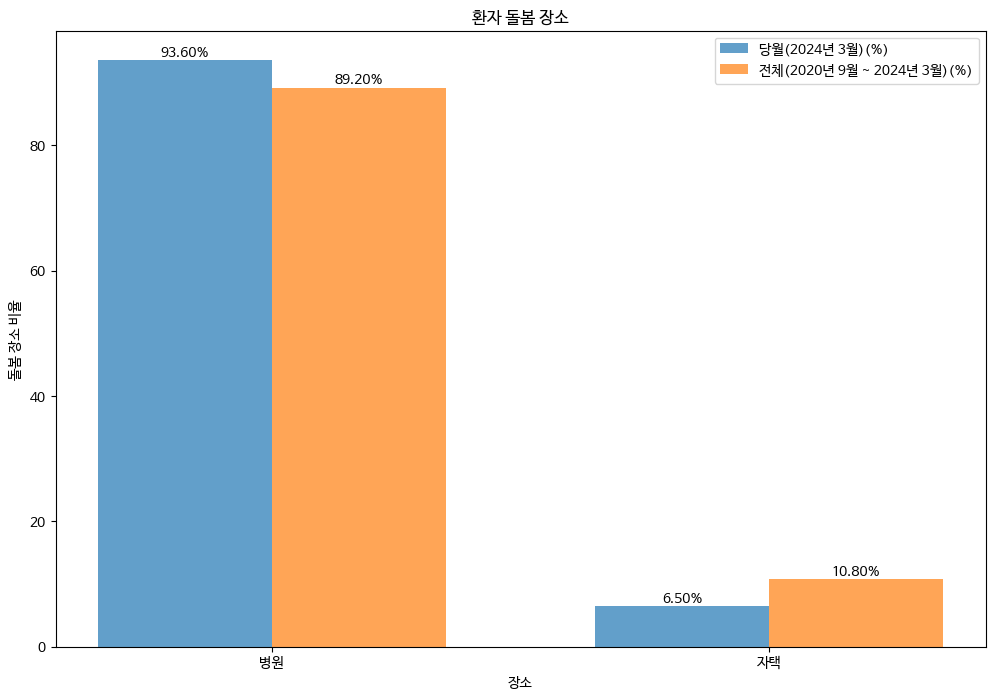

In [16]:
# 막대의 위치
bar_width = 0.35
index = np.arange(len(df_care_place['장소']))

plt.figure(figsize=(12, 8))

bar1 = plt.bar(index, df_care_place['당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width, df_care_place['전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('환자 돌봄 장소')
plt.xlabel('장소')
plt.ylabel('돌봄 장소 비율')
plt.xticks(index + bar_width / 2, df_care_place['장소'])
plt.legend()

# 막대 위에 수치(%) 표시
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.2f%%' % height, ha='center', va='bottom')

plt.show()

In [13]:
# 병원 등급별 공고 비율 dataframe
notice_percentage = {
    '병원 등급': ['상급종합병원', '종합병원', '병원', '의원', '요양병원', '한방병원', '한의원', '치과의원', '치과병원', '보건소', '보건진료소', '보건의료원', '보건지소'],
    '공고비율 - 당월(2024년 3월)(%)': [17.7, 27.4, 36.1, 8.3, 1.4, 6.8, 2.2, 0, 0, 0, 0, 0, 0],
    '공고비율 - 전체(2020년 9월 ~ 2024년 3월)(%)': [36.4, 30.1, 22, 4.7, 2.3, 3.8, 0.7, 0.1, 0.1, 0, 0, 0, 0]
}

df_notice_percentage = pd.DataFrame(notice_percentage)
df_notice_percentage

,병원 등급,공고비율 - 당월(2024년 3월)(%),공고비율 - 전체(2020년 9월 ~ 2024년 3월)(%)
0,상급종합병원,17.7,36.4
1,종합병원,27.4,30.1
2,병원,36.1,22.0
3,의원,8.3,4.7
4,요양병원,1.4,2.3
5,한방병원,6.8,3.8
6,한의원,2.2,0.7
7,치과의원,0.0,0.1
8,치과병원,0.0,0.1
9,보건소,0.0,0.0


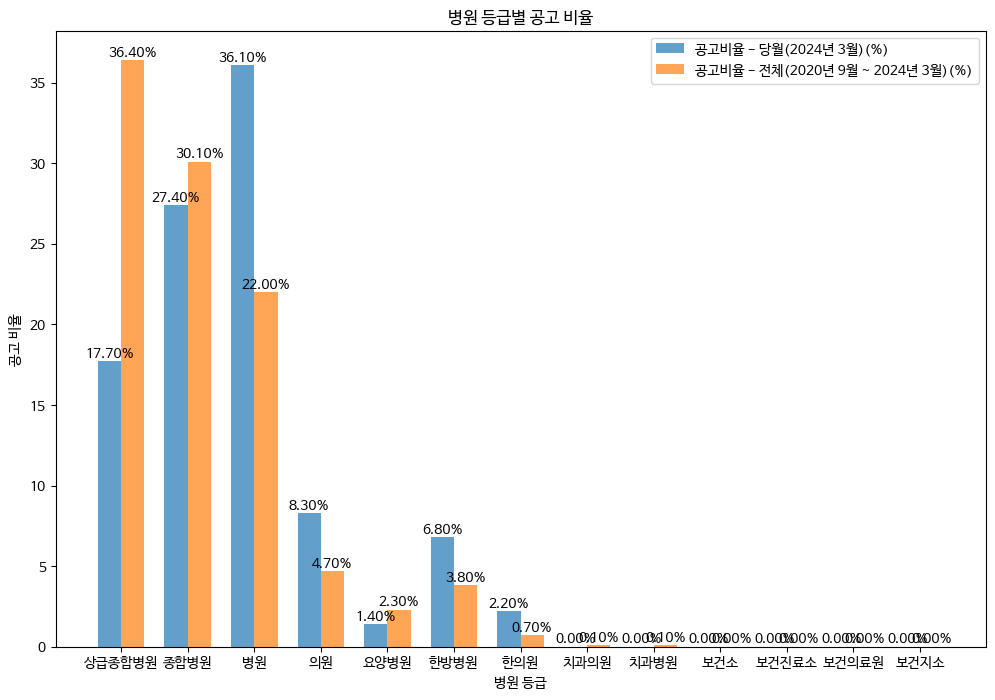

In [21]:
# 막대의 위치
bar_width = 0.35
index = np.arange(len(df_notice_percentage['병원 등급']))

plt.figure(figsize=(12, 8))

bar1 = plt.bar(index, df_notice_percentage['공고비율 - 당월(2024년 3월)(%)'], bar_width, alpha=0.7, label='공고비율 - 당월(2024년 3월)(%)')
bar2 = plt.bar(index + bar_width, df_notice_percentage['공고비율 - 전체(2020년 9월 ~ 2024년 3월)(%)'], bar_width, alpha=0.7, label='공고비율 - 전체(2020년 9월 ~ 2024년 3월)(%)')

plt.title('병원 등급별 공고 비율')
plt.xlabel('병원 등급')
plt.ylabel('공고 비율')
plt.xticks(index + bar_width / 2, df_notice_percentage['병원 등급'])
plt.legend()

# 막대 위에 수치(%) 표시
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.2f%%' % height, ha='center', va='bottom')

plt.show()

## 결론
1) 환자 돌봄 장소의 비율 : 2024년 3월 당월 및 전체기간 모두 '병원'이 압도적으로 높음
2) 3차 의료기관(상급종합병원) > 2차 의료기관(종합병원 > 병원) > 1차 의료기관(의원)에 공고가 집중되어있음.
   ### ▶ 가족요양전문보호사를 중점으로 육성하기로 한 기존 사업 방향은 재검토 필요